# Background Information


Link: https://www.kaggle.com/rikdifos/credit-card-approval-prediction
Essentially, this case is an AD policy. 
Goal is to build a credit risk rank ordering model. Trying with logistic regression and xgboost
Task:
1) Clean the datasets and join them.
2) Visualize on that data to make it presentablle and understandable to the board of directores.
3) Find the fastest and the most accurate Model to find the features that are needed to be accessed and in which order while approoving a Credit for a new customer.


# Analysis

In [377]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [497]:
#Import Data
app = pd.read_csv("data/application_record.csv")
perf = pd.read_csv("data/credit_record.csv")

# Data Exploration

In [73]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [74]:
app.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [378]:
perf.head().T

,0,1,2,3,4
ID,5001711,5001711,5001711,5001711,5001712
MONTHS_BALANCE,0,-1,-2,-3,0
STATUS,X,0,0,0,C


In [549]:
print(perf['MONTHS_BALANCE'].min())  # Oldest data is 5 yrs old
print(perf['MONTHS_BALANCE'].max())  # 0 is the most recent data
print(perf['ID'].nunique() )         # So, about 46k-ish of Unique ID's 

print(app.shape)            # (438,557, 18)
print(app['ID'].nunique())  #No. of accts in apps = 438,510

print(perf.shape)            # (1,048,575, 5)
print(perf['ID'].nunique())  #No. of accts in perf = 45,985

# I need to make sure I inner join the dataset in the end to remove extra apps info
print (len(set(app['ID']).intersection(set(perf['ID'])))) #36,457


-60
0
45985
(438557, 18)
438510
(1048575, 5)
45985
36457


In [535]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
 3   OverDues        1048575 non-null  int32 
 4   Counter         1048575 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 36.0+ MB



__Reference Info__:
1. Month_Balance: (Weird Statement Number). The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

3. DAYS_EMPLOYED = Count backwards from current day(0). If positive, it means the person currently unemployed.
4. DAYS_BIRTH = Count backwards from current day (0), -1 means yesterday

__Summary__:
1. Some missind data on OCCUPATION_TYPE: 304354  instead of 438557 


## Tweaking the Dataset

In [505]:
#Adding a column for Default, and defining what default is
'''
Status: 
    0: 1-29 days past due 
    1: 30-59 days past due 
    2: 60-89 days overdue 
    3: 90-119 days overdue  <<< Usually PD 3M+ is similar enough to Charge-Off
    4: 120-149 days overdue 
    5: Overdue or bad debts, write-offs for more than 150 days 
    
    C: paid off that month 
    X: No loan for the month << Interesting, do they have recurring loans?
'''

# defaulters= ['3','4','5']
defaulters= ['5']
perf['OverDues'] = np.where(perf['STATUS'].isin(defaulters), 1, 0)
perf['Counter']= 1 #For counting accounts later
perf.head()

,ID,MONTHS_BALANCE,STATUS,OverDues,Counter
0,5001711,0,X,0,1
1,5001711,-1,0,0,1
2,5001711,-2,0,0,1
3,5001711,-3,0,0,1
4,5001712,0,C,0,1


### Merging the data to look at the data holistically

In [551]:
#Merging the data after cleaning
app = app.drop_duplicates('ID', keep='last') # Taking out the duplicate ID's
print (app.shape)
agg = pd.merge(app,perf, on = 'ID') #Basically an inner join here

print(agg.shape)         #Data with app info and statement info
print( agg['ID'].nunique() )      #Total Unique ID in the set 36457
agg.head()

(438510, 18)
(777715, 22)


36457

In [568]:
agg.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,OverDues,Counter
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,0,C,0,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-1,C,0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-2,C,0,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-3,C,0,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,-4,C,0,1


In [599]:
agg2 = pd.merge(agg,MinStmt, on='ID')

In [598]:
del agg2

In [602]:
agg2['stmt_no'] = agg2['MONTHS_BALANCE'] + (-1*agg2['Min_M'])
agg2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,OverDues,Counter,Min_M,OverDues_Cum,stmt_no
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,0,C,0,1,-15,0,15
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-1,C,0,1,-15,0,14
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-2,C,0,1,-15,0,13
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-3,C,0,1,-15,0,12
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,NaN,2.0,-4,C,0,1,-15,0,11


In [588]:
# Creating Statement Data

#Compiling the data off from performance
MinStmt = agg[['ID','MONTHS_BALANCE']].groupby(['ID']).min()
MinStmt = MinStmt.reset_index()  #resetting index
MinStmt = MinStmt.rename(columns={"MONTHS_BALANCE": "Min_M"}) #Rename column

OD_agg = agg[['ID','OverDues']].groupby(['ID']).sum()
OD_agg = OD_agg.reset_index()  #resetting index

MinStmt['OverDues_Cum'] = OD_agg['OverDues']
MinStmt[MinStmt['OverDues_Cum']>0].head()


agg2 = pd.merge(agg,MinStmt, on='ID')   #Mergin into one df
agg2['stmt_no'] = agg2['MONTHS_BALANCE'] + (-1*agg2['Min_M']) # Creating Stmt Num.

# Interesting, they seem to continue having data post charge-off. 
# May be I should just summarize it as anything with >0 as CO  
# Sample account deep dive
# perf[perf['ID']== 5008827][['ID','MONTHS_BALANCE','OverDues','STATUS']]
# MinStmt = MinStmt.reset_index()  #resetting index
print( MinStmt['ID'].nunique() ) 

36457


,ID,MONTHS_BALANCE,OverDues_Cum
0,5008804,-15,0
1,5008805,-14,0
2,5008806,-29,0
3,5008808,-4,0
4,5008809,-26,0


<AxesSubplot:ylabel='Frequency'>

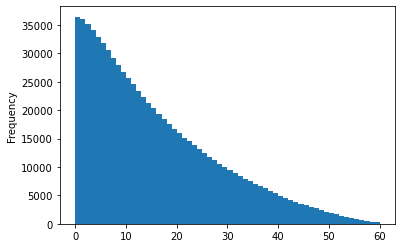

In [603]:
#Creating Vintages

# df3[['ID','stmt_no']].groupby(['stmt_no']).count()
# Of the 45,985 accounts, there seems to be multiple vintages in here. 

# May be we should cutup the vintages
agg2['stmt_no'].plot(kind='hist',bins=60,density=False)


In [606]:
# Creating Vintages
# create a list of our conditions
conditions = [
    (agg2['Min_M'] <= -49),
    (agg2['Min_M'] > -49) & (agg2['Min_M'] <= -36),
    (agg2['Min_M'] > -36) & (agg2['Min_M'] <= -24),
    (agg2['Min_M'] > -24) & (agg2['Min_M'] <= -12),
    (agg2['Min_M'] > -12) 
    ]

# create a list of the values we want to assign for each condition
values = ['v1', 'v2', 'v3', 'v4','v5']

# create a new column and use np.select to assign values to it using our lists as arguments
agg2['vintage'] = np.select(conditions, values)

# display updated DataFrame
agg2.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,OverDues,Counter,Min_M,OverDues_Cum,stmt_no,vintage
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-9,0,0,1,-13,0,4,v4
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-10,2,0,1,-13,0,3,v4
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-11,1,0,1,-13,0,2,v4
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-12,0,0,1,-13,0,1,v4
777714,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,Laborers,1.0,-13,0,0,1,-13,0,0,v4


In [609]:
temp_pd = agg2[['vintage','stmt_no','OverDues','Counter']].groupby(['vintage','stmt_no']).sum().reset_index()
temp_pd.head()

,vintage,stmt_no,OverDues,Counter
0,v1,0,0,4530
1,v1,1,1,4525
2,v1,2,2,4471
3,v1,3,2,4433
4,v1,4,3,4366


In [610]:
temp_pd = agg2[['vintage','stmt_no','OverDues','Counter']].groupby(['vintage','stmt_no']).sum().reset_index()
temp_pd['PD']= temp_pd['OverDues']/temp_pd['Counter']
temp_pd.head()

,vintage,stmt_no,OverDues,Counter,PD
0,v1,0,0,4530,0.000000
1,v1,1,1,4525,0.000221
2,v1,2,2,4471,0.000447
3,v1,3,2,4433,0.000451
4,v1,4,3,4366,0.000687


<AxesSubplot:xlabel='stmt_no', ylabel='PD'>

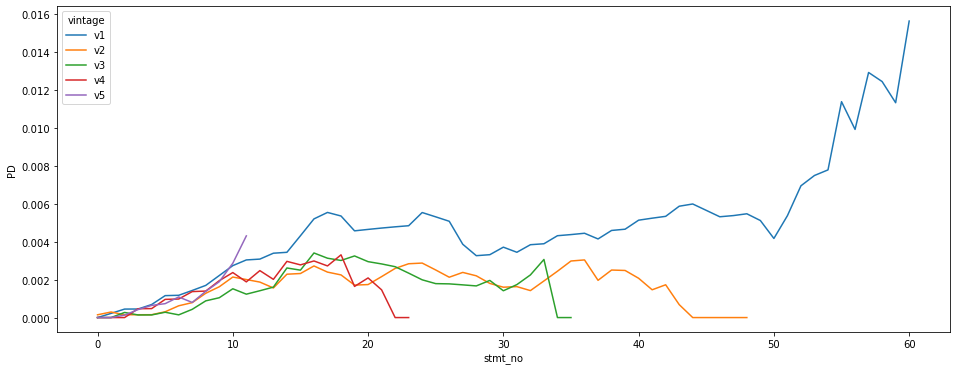

In [611]:
#Checking the PD/CO by vintage. The v2-v4 seem pretty close, but v1 seem different from the rest.
#Also, charge-off data seems to stablize after the 12yr mark. 
#It's very weird that vintage 1 has a spike in charge-off from Stmt50 onwards
# I probably need to think of the right timeframe to assess charge-off risk
plt.figure(figsize = (16,6))
sns.lineplot(data=temp_pd, x="stmt_no", y="PD", hue="vintage")

### Compiling the charge-off data for analysis

In [612]:
filter1 = MinStmt['OverDues_Cum'] > 0
MinStmt['CO'] = np.where(filter1,1,0)   #Use numpy to add a column based on condidtion from another column
MinStmt[MinStmt['OverDues_Cum']>0].head()

,ID,Min_M,OverDues_Cum,CO
19,5008827,-37,5,1
646,5009628,-59,4,1
739,5009744,-19,8,1
741,5009746,-55,13,1
743,5009749,-15,4,1


In [614]:
#Filtering to just first 24M of data. 
# We are going to try to figure out the probability of CO in first 24M
MinStmt_filtered = MinStmt[MinStmt['Min_M']>=-24]
MinStmt_filtered.shape

(18310, 4)

In [617]:
df3 = pd.merge(app,MinStmt_filtered, on = 'ID') #Basically a inner  join here

print(df3.shape)
df3.head()

(18310, 21)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Min_M,OverDues_Cum,CO
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14,0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4,0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-20,0,0
4,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-16,0,0


In [626]:
# Put in the columns that we want to make the dummie variable of...
df4 = pd.get_dummies(df3, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'], drop_first = False)
df4.columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Min_M', 'OverDues_Cum', 'CO',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apart

In [545]:
print('The shape of the merged dataset is ' + str(df3.shape) +'.')

The shape of the merged dataset is (18310, 24).


Things to ponder:
1. So we have the perf data mixed with app data now. 
2. Also need to think of the average age of these accounts. Did they even have enough time to charge-off?
2. Also, does one ID have more than one loan? Should a good way to check would be if one ID has multiple 0's on the date?
3. At what point, do we look at DQ/CO? Should we look at Cum. DQ/CO?
4. Also I don't like the way statement number is calculated. May be for each ID, I'll get the lowest stmtnumber,convert to positive, and add it to all statements, reversing the stmt number


# Visualizing the Dataset & Data Cleaning

In [430]:
#Spot checking a couple of accounts

df3[df3['ID']== 5008805][['ID','MONTHS_BALANCE_x','stmt_no','STATUS']]
# df4[df4['ID']== 5008806][['ID','MONTHS_BALANCE','STATUS']]

# A couple of accounts to test out: 5008804,5008805,5008806,5008808,5008809

,ID,MONTHS_BALANCE_x,stmt_no,STATUS
16,5008805,0,14,C
17,5008805,-1,13,C
18,5008805,-2,12,C
19,5008805,-3,11,C
20,5008805,-4,10,C
21,5008805,-5,9,C
22,5008805,-6,8,C
23,5008805,-7,7,C
24,5008805,-8,6,C
25,5008805,-9,5,C


The age of the customers are given in a format which is little complicated. It is given as the amount of days from birth till today and the -ve sign indicated that the time is in past. So, we are going to convert this into the years and then map a histogram chart that tells us the amount of customer and which age bracket they are in.

(19.951999999999998, 24.7]     630
(24.7, 29.4]                  3375
(29.4, 34.1]                  4267
(34.1, 38.8]                  3539
(38.8, 43.5]                  4350
(43.5, 48.2]                  3566
(48.2, 52.9]                  2490
(52.9, 57.6]                  1924
(57.6, 62.3]                   819
(62.3, 67.0]                   174
Name: Age, dtype: int64


<AxesSubplot:ylabel='Frequency'>

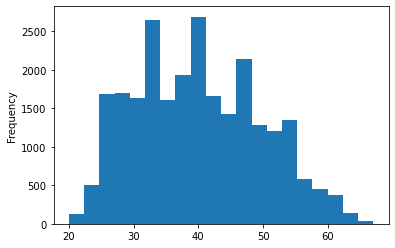

In [79]:
# Converting the Days of Birth field to Age in years.
df4['Age']=-(df4['DAYS_BIRTH'])//365
print(df4['Age'].value_counts(bins=10,normalize=False,sort=False))

df4['Age'].plot(kind='hist',bins=20,density=False)

Employment time VS Customer Frequency
Employment column is represented in the same format and we are going to covvert it the same way we did for the age.
Then, we map a histogram representing the data of amount of customers vs the years they have been employed.

<AxesSubplot:ylabel='Frequency'>

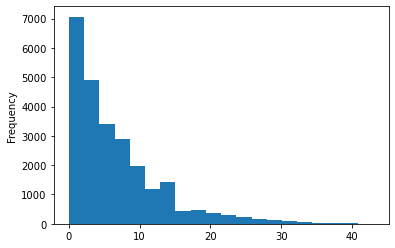

In [80]:
# Converting the Days_Employed field from days to Years and the visualising.
df4['Employed']=-(df4['DAYS_EMPLOYED'])//365	
df4[df4['Employed']<0] = np.nan # replace by na
df4['DAYS_EMPLOYED']
df4['Employed'].fillna(df4['Employed'].mean(),inplace=False) #replace na by mean
df4['Employed'].plot(kind='hist',bins=20,density=False)

Various Occupation Classifications

In [81]:
# We deleted teh occupation variable before
df4['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:>

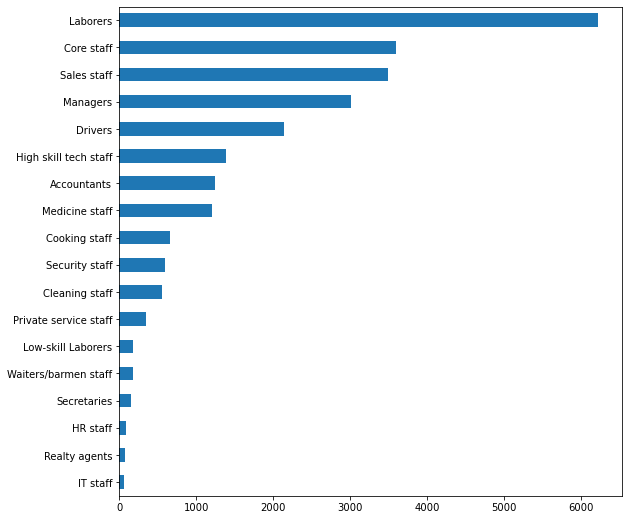

In [387]:
# We deleted teh occupation variable before
df4['OCCUPATION_TYPE'].value_counts().sort_values().plot(kind='barh', figsize=(9,9))


In [83]:
PNoLoan = (df4.loc[df4['STATUS'] == 'X'].shape[0]/df4.shape[0]) * 100
print(str(round(PNoLoan, 2)) + "% of people have no loans.")

26.65% of people have no loans.


In [84]:
PPaidOf = (df4.loc[df4['STATUS'] == 'C'].shape[0]/df4.shape[0]) * 100
print(str(round(PPaidOf, 2)) + "% of customers have paid off there dues.")

49.01% of customers have paid off there dues.


Now we will declare the people who have not paid there dues as the defaulters. These are represented by numbers in the Status field of the Credit Records dataset.

Defaulters VS PaidOff
This chart will represent the amount of money made by People who have paid of vs the Defaulters.

Text(0, 0.5, 'Number of Customers')

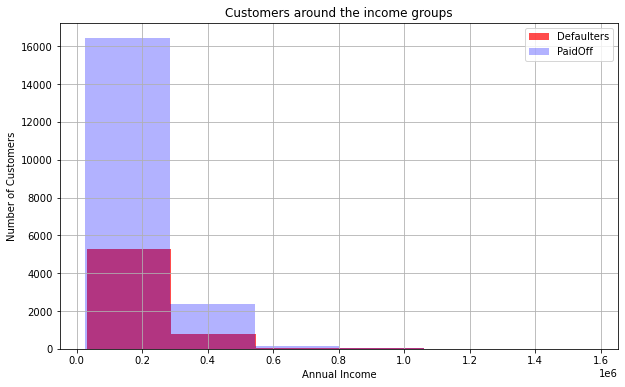

In [86]:
plt.figure(figsize=(10,6))
df4[df4['OverDues']==1]['AMT_INCOME_TOTAL'].hist(alpha=0.7,color='Red', bins=6,label='Defaulters')
df4[df4['OverDues']==0]['AMT_INCOME_TOTAL'].hist(alpha=0.3,color='Blue', bins=6,label='PaidOff')
                                                    
plt.title('Customers around the income groups')                                                    
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')

([<matplotlib.axis.XTick at 0x1e89ae537f0>,
 [Text(0.0, 0, 'Female'), Text(1.0, 0, 'Male')])

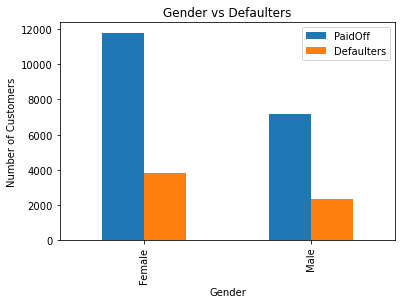

In [87]:
# Female vs Male Check
pd.crosstab(df4.CODE_GENDER,df4.OverDues).plot(kind='bar')
plt.title('Gender vs Defaulters')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(labels = ["PaidOff", "Defaulters"])
plt.xticks(np.linspace(0, 1, 2), ['Female','Male'])

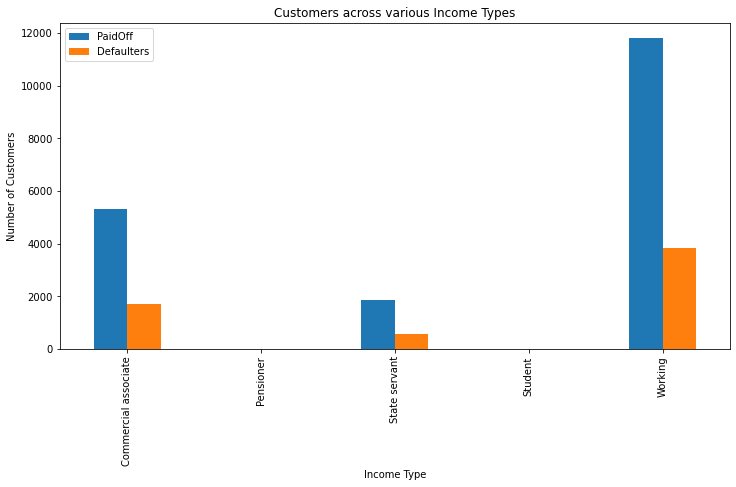

In [88]:
#This chart tells us the income types of the people in both categories.
pd.crosstab(df4.NAME_INCOME_TYPE, df4.OverDues).plot(kind='bar', figsize=(12,6))
plt.title('Customers across various Income Types')
plt.xlabel('Income Type')
plt.ylabel('Number of Customers')
plt.legend(labels = ["PaidOff", "Defaulters"])

### Correlation Check

In [89]:
# Now we are going to find the corelation between features for more in-depth review of how features work.
# The lesser they are correlated the better this is.
df7['OverDues'] = np.where(df7.STATUS.isin(defaulters), 1, 0)

<AxesSubplot:>

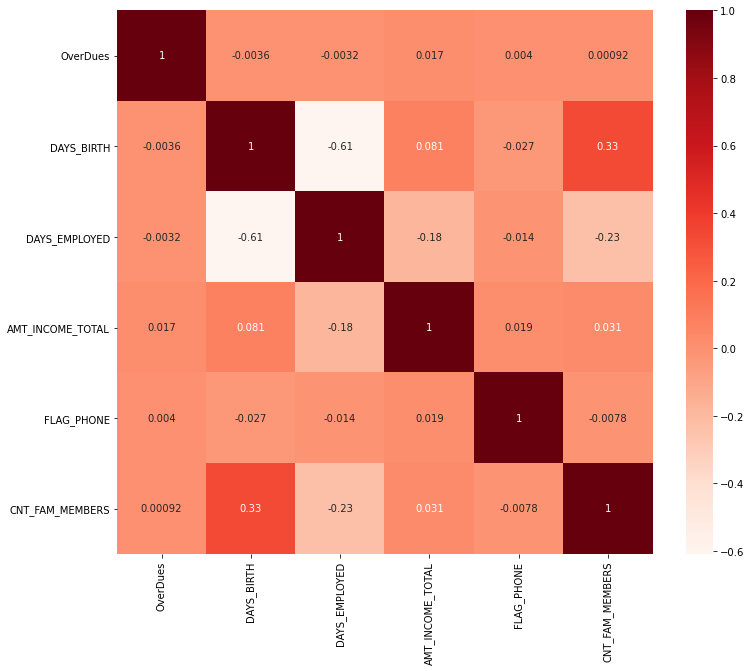

In [90]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))

corr = df7[['OverDues', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'FLAG_PHONE', 'CNT_FAM_MEMBERS']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

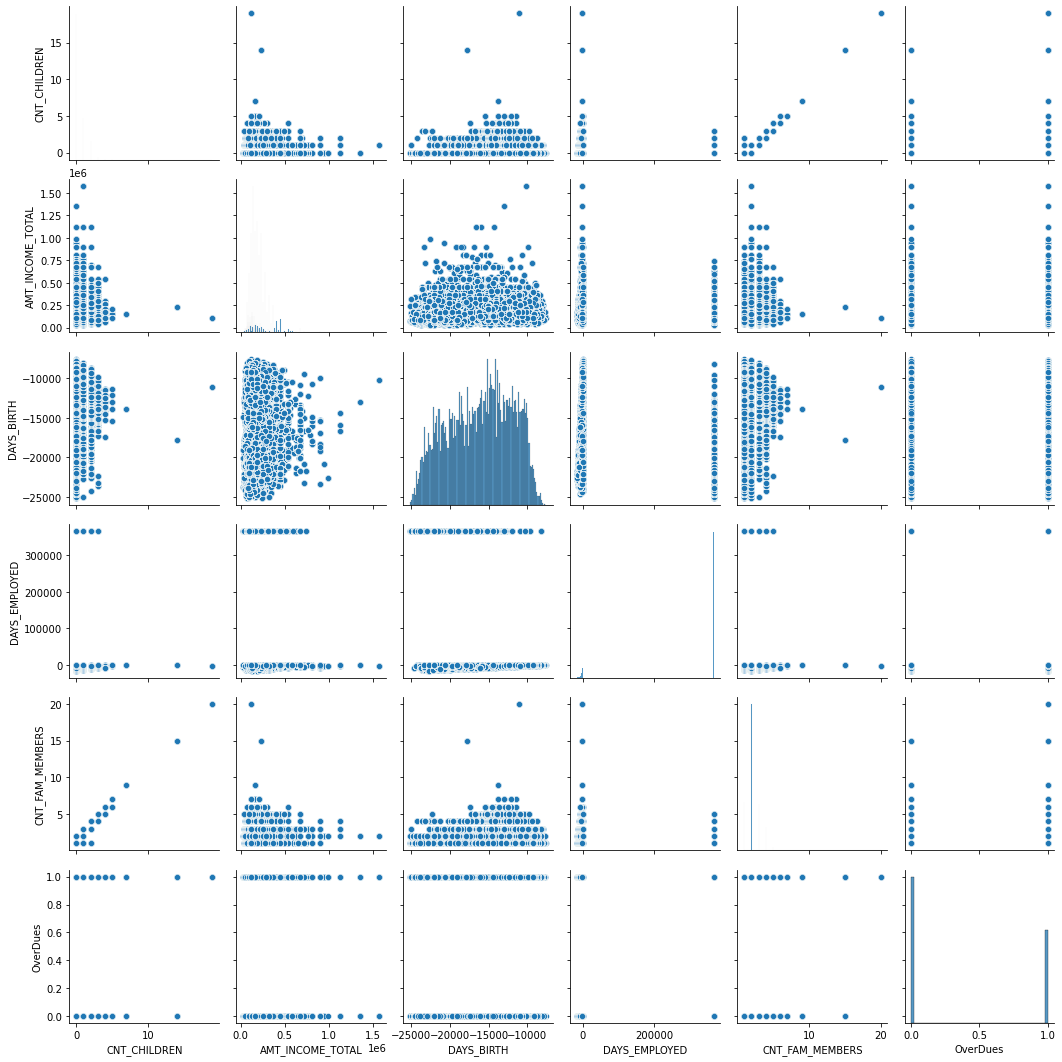

In [92]:
#Now we will do a bit of Pairplottin which is better to see the distribution of the single variable and its relation with other variable.
# This will help us identify trends for follow-up analysis.
sns.pairplot(df7[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'OverDues']])

### Predictive Modelling

In [627]:
#Making a copy of this df just in case we want to retry from the start
df7 = df4.copy()
print(df7.shape)
df7.head()

Now we have columns with more than one catagorical values and there are many of them.
If we go on converting each and every one of them into different columns with two categories it will take a lot of time.
So, to simplify this we will use get_dummies cmd and mention the colmumns that we want to make dummie vaiables of.
We do this to make as many features as possible for our prediction model as we cannot use string for analysis.

In [630]:
# Gettomg Dummy variables and encoding them
df7.columns
#Mentioning our Features
Features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']

In [631]:
#Train TEst Split
from sklearn import model_selection
from sklearn.model_selection import train_test_split

train, test = train_test_split(df7, test_size = 0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[Features]
label_train = train['CO']
features_test = test[Features]
label_test = test['CO']

In [632]:
#Model1 : Random Forest Classifier
# This Model test all the features in multiple times in different orders. This is the reason that it is the slowest one but in theory oit should be the most accurate one as well.

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
RFCaccuracy_train = (accuracy_score(pred_train,label_train)) * 100
RFCaccuracy_test = (accuracy_score(pred_test,label_test)) * 100

In [635]:
#Checking Accuracy, Precision and Confusion

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Non Defaulter','Defaulter']  
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.997815401419989 

Precision Score
[0.99836006 0.4       ] 

Confusion Matrix
               Non Defaulter  Defaulter
Non Defaulter           5479          3
Defaulter                  9          2 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5482
           1       0.40      0.18      0.25        11

    accuracy                           1.00      5493
   macro avg       0.70      0.59      0.62      5493
weighted avg       1.00      1.00      1.00      5493
 



#### Somers'd Calculation

In [681]:
def somersd(score,target):
    score, target = (list(t) for t in zip(*sorted(zip(score, target))))
    ttl_num=len(score)
    bin=20;
    n=ttl_num/20;
    sum_target=sum(target);
    sum_notarget=ttl_num-sum_target;
    pct_target=[];
    pct_notarget=[];
    pct_target.append(0.0);
    pct_notarget.append(0.0);
    for i in range(1,bin):
        if (i!=bin):
            pct_target.append((sum(target[0:(i*n-1)])+0.0)/sum_target);
            pct_notarget.append((i*n-sum(target[0:(i*n-1)])+0.0)/sum_notarget)
    pct_target.append(1.0);
    pct_notarget.append(1.0);
    sd=[]
    for i in range(1,bin+1):
        sd.append((pct_target[i]+pct_target[i-1])*(pct_notarget[i]-pct_notarget[i-1]));
        somersd=1-sum(sd);
    return(somersd);

In [692]:
AR_label = label_test.to_numpy()
AR_label
len(AR_label)

5493

In [694]:
score = tree.predict(features_test)
score
len(score)

5493

In [691]:
SDresult =somersd(score,AR_label)
print(SDresult)

TypeError: slice indices must be integers or None or have an __index__ method

### Feature Importance

<AxesSubplot:title={'center':'Decision Tree Classifier\nFeature Importances'}, ylabel='features'>

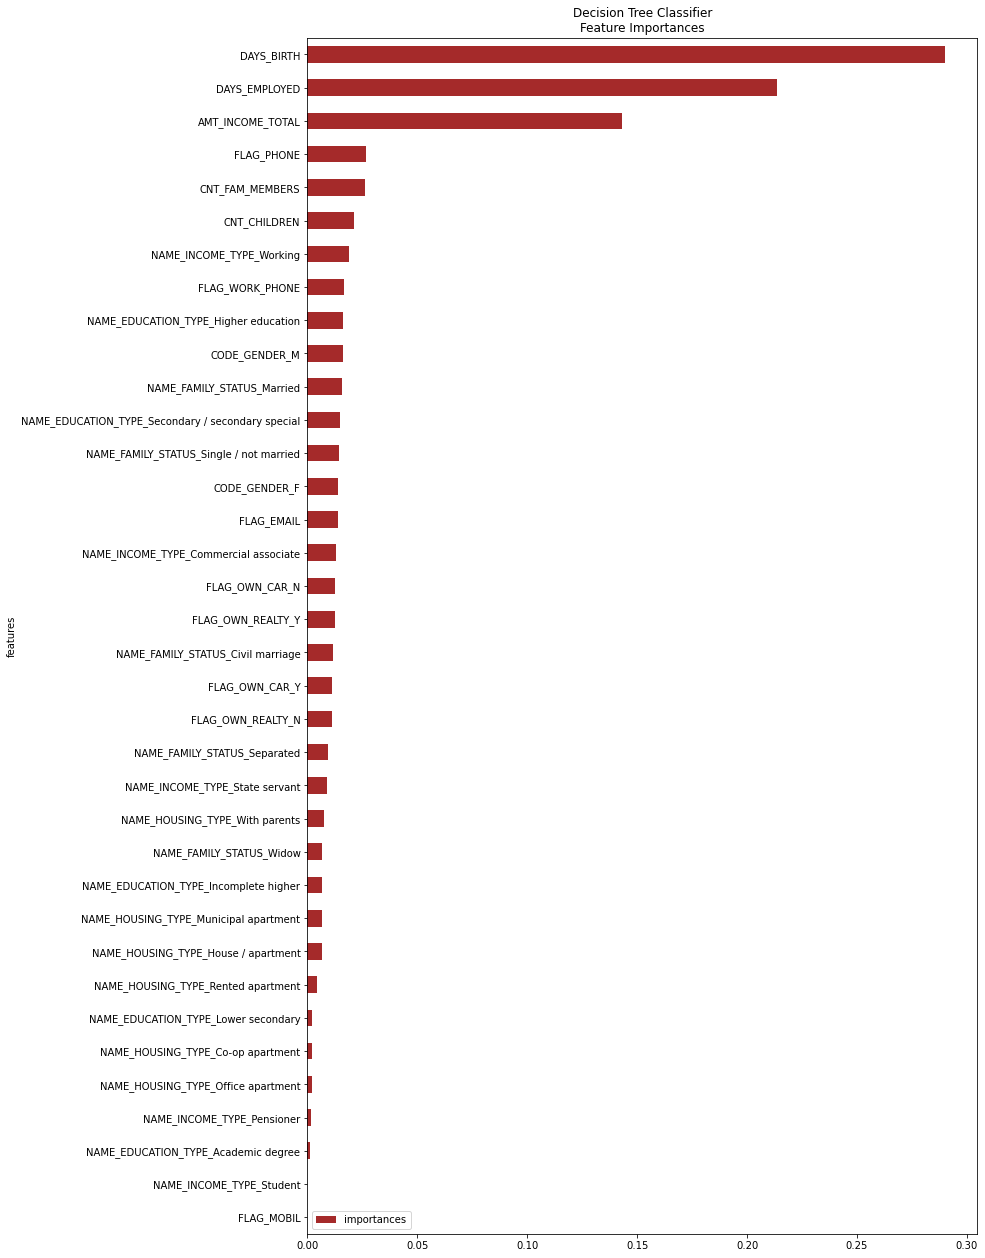

In [636]:
dfz=pd.DataFrame({'features':features_train.columns,'importances':tree.feature_importances_})
dfz.sort_values('importances',inplace=True)
dfz.plot(kind='barh', title = 'Decision Tree Classifier\nFeature Importances', y='importances',x='features',color='brown', figsize=(12,22))

Conclusion....
From the model testing done above we can see that the Decision Tree Classifier is better faster and has almost the same accuracy as compared to the Random Forest Classifier.
This tells us that on per our employers demand the best fit for there work would be the Decision tree classifier and We did the feature importance chart on them.
The most important features that are at the top of the chart gives the bank a slight insight on what to test for while approving a credit based on there previous customer data.

## Scoring the Data

In [ ]:
#The alternative is to get AUC and do SD = 2*AUC -1

In [637]:
# scores_raw = tree.predict_proba(test)
scores_raw = tree.predict_proba(features_test)
scores_raw

array([[0.60504202, 0.39495798],
       [0.83474576, 0.16525424],
       [0.45      , 0.55      ],
       ...,
       [0.83064516, 0.16935484],
       [1.        , 0.        ],
       [0.83774834, 0.16225166]])

In [638]:
def array_parser(df):
    num = len(df)
    final = []
    counter = 0
    for x in df:
        final.append(x[1])
        counter = counter+1
    return final

In [639]:
cleaned_list = array_parser(scores_raw)
cleaned_list_pd = pd.DataFrame(cleaned_list)
cleaned_list_pd.shape

(5493, 1)

In [640]:
scored_data = features_test.copy(deep = True)
scored_data['scores']= pd.Series(cleaned_list, index = scored_data.index)

In [641]:
scored_data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,scores
0,1,180000.0,-15670,-1654,1,0,0,0,3.0,0,...,0,0,0,0,0,0,0,0,1,0.394958
1,0,247500.0,-14567,-7369,1,1,0,0,2.0,0,...,0,0,0,0,1,0,0,0,0,0.165254
2,0,112500.0,-20433,-2396,1,0,0,0,1.0,0,...,1,0,0,0,1,0,0,0,0,0.550000
3,0,225000.0,-8345,-789,1,0,0,0,1.0,0,...,0,1,0,0,1,0,0,0,0,0.297872
4,0,67500.0,-22116,365243,1,0,0,0,1.0,1,...,0,0,1,0,1,0,0,0,0,0.350000


(-0.002, 0.1]    342
(0.1, 0.2]       438
(0.2, 0.3]       775
(0.3, 0.4]       808
(0.4, 0.5]       831
(0.5, 0.6]       616
(0.6, 0.7]       456
(0.7, 0.8]       392
(0.8, 0.9]       341
(0.9, 1.0]       494
Name: scores, dtype: int64


<AxesSubplot:ylabel='Frequency'>

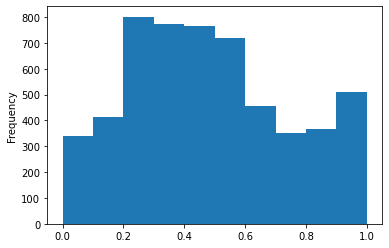

In [663]:
# Getting the rank ordering scoring range
testing = scored_data
print(testing['scores'].value_counts(bins=10,normalize=False,sort=False))
testing['scores'].plot(kind='hist',bins=10,density=False)

In [664]:
testing['scores100']= testing['scores']*100/10

In [665]:
bins = list(item for item in range(0,11))
labels = bins.copy()
labels.pop(0)
# labels.pop(98)
bins = list(item for item in range(0,11))

In [666]:
print(bins)
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [667]:
# Binning scores into two digit groups
testing['binned'] = pd.cut(testing['scores100'],bins =bins, labels=labels)
testing.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,scores,scores100,binned
0,1,180000.0,-15670,-1654,1,0,0,0,3.0,0,...,0,0,0,0,0,0,1,0.394958,3.949580,4
1,0,247500.0,-14567,-7369,1,1,0,0,2.0,0,...,0,0,1,0,0,0,0,0.165254,1.652542,2
2,0,112500.0,-20433,-2396,1,0,0,0,1.0,0,...,0,0,1,0,0,0,0,0.550000,5.500000,6
3,0,225000.0,-8345,-789,1,0,0,0,1.0,0,...,0,0,1,0,0,0,0,0.297872,2.978723,3
4,0,67500.0,-22116,365243,1,0,0,0,1.0,1,...,1,0,1,0,0,0,0,0.350000,3.500000,4


In [668]:
df5 = testing.join(label_test)
df5.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,...,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,scores,scores100,binned,CO
0,1,180000.0,-15670,-1654,1,0,0,0,3.0,0,...,0,0,0,0,0,1,0.394958,3.949580,4,0
1,0,247500.0,-14567,-7369,1,1,0,0,2.0,0,...,0,1,0,0,0,0,0.165254,1.652542,2,0
2,0,112500.0,-20433,-2396,1,0,0,0,1.0,0,...,0,1,0,0,0,0,0.550000,5.500000,6,0
3,0,225000.0,-8345,-789,1,0,0,0,1.0,0,...,0,1,0,0,0,0,0.297872,2.978723,3,0
4,0,67500.0,-22116,365243,1,0,0,0,1.0,1,...,0,1,0,0,0,0,0.350000,3.500000,4,0


In [669]:
counter = df5['binned'].value_counts()
counter = counter.sort_index()
counter = pd.DataFrame(counter)
counter['total']= counter['binned']
counter['score_bin'] = counter.index

In [670]:
counter.head()

,binned,total,score_bin
1,185,185,1
2,438,438,2
3,775,775,3
4,808,808,4
5,831,831,5


In [671]:
#Getting all the overdues
SummedUp = df5.groupby(['binned']).sum()
JustPD = pd.DataFrame(SummedUp['CO'])
JustPD.head()

,CO
binned,
1,0
2,0
3,2
4,2
5,1


In [672]:
agg_df = JustPD.join(counter['score_bin']) 
agg_df = agg_df.join(counter['total'])
agg_df.head()

,CO,score_bin,total
binned,,,
1,0,1,185
2,0,2,438
3,2,3,775
4,2,4,808
5,1,5,831


In [676]:
agg_df['PD'] = agg_df['CO']/agg_df['total']
agg_df['PD_ann'] = agg_df['PD']*12
agg_df.head(100)

,CO,score_bin,total,PD,PD_ann
binned,,,,,
1,0,1,185,0.000000,0.000000
2,0,2,438,0.000000,0.000000
3,2,3,775,0.002581,0.030968
4,2,4,808,0.002475,0.029703
5,1,5,831,0.001203,0.014440
6,0,6,616,0.000000,0.000000
7,0,7,456,0.000000,0.000000
8,4,8,392,0.010204,0.122449
9,0,9,341,0.000000,0.000000


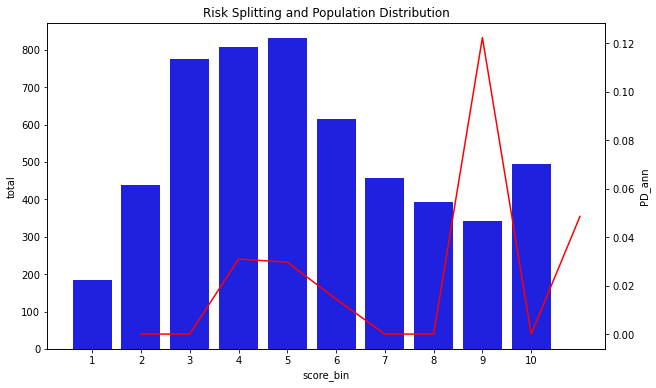

In [695]:
# Set figure size with matplotlib
fig, ax1 = plt.subplots(figsize=(10,6))

# Create bar plot
sns.barplot(x='score_bin',y='total',data=agg_df, ax =ax1, color='b')
# plt.xticks([0,10,20,30,40,50,60,70,80,90,100]) #Spacing out the ticks

#Create the second plot
ax2 = ax1.twinx()
sns.lineplot(x="score_bin", y='PD_ann',data=agg_df, ax =ax2, color='r')
 
# Set title with matplotlib
plt.title('Risk Splitting and Population Distribution')
ax2.grid(False)


plt.show()

# END OF ANALYSIS

### Trying another Decision Tree

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(features_train, label_train)

# predict train set
pred_train=tree.predict(features_train)
# predict test set
pred_test=tree.predict(features_test)


from sklearn.metrics import accuracy_score
DTCaccuracy_train = (accuracy_score(pred_train,label_train)) * 100
DTCaccuracy_test = (accuracy_score(pred_test,label_test)) * 100


In [108]:
print('Training Accuracy is ' + str(round(DTCaccuracy_train, 4)) + '%')
print('Test Accuracy is ' +  str(round(DTCaccuracy_test, 4)) + '%')

Training Accuracy is 72.3582%
Test Accuracy is 71.5235%


In [110]:
pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,122694,20099
1,46341,44181


In [114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('Accuracy Score')
print(accuracy_score(label_test, pred_test),'\n')

print('Precision Score')
print(precision_score(label_test, pred_test,average = None),'\n')

print('Confusion Matrix')
array = confusion_matrix(label_test, pred_test)
columns = ['Non Defaulter','Defaulter']  
print(pd.DataFrame(array,columns = columns, index = columns),'\n')

print('Classification Report')
print(classification_report(label_test, pred_test),'\n')

Accuracy Score
0.7152347684460922 

Precision Score
[0.72584968 0.6873211 ] 

Confusion Matrix
               Non Defaulter  Defaulter
Non Defaulter         122694      20099
Defaulter              46341      44181 

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.86      0.79    142793
           1       0.69      0.49      0.57     90522

    accuracy                           0.72    233315
   macro avg       0.71      0.67      0.68    233315
weighted avg       0.71      0.72      0.70    233315
 

